In [1]:
#Creating Baseline using Nearest Means Classifier

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_train = pd.read_csv('mushroom_train.csv', usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
data_new_train = data_train.to_numpy()

In [5]:
#categorical_col = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
categorical_col = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season','class']
categorical_data_train = data_train[categorical_col]
encoded_data_train = pd.get_dummies(categorical_data_train, prefix = categorical_col, prefix_sep='_')

In [6]:
numerical_col_train = data_train.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
numerical_col_scaled_train = scaler.fit_transform(numerical_col_train)
numerical_data_train = pd.DataFrame(numerical_col_scaled_train)

In [7]:
final_data_train = pd.concat([numerical_data_train, encoded_data_train], axis = 1)
#final_array_train = final_data_train.to_numpy()
#print(final_array_train.shape)
print(final_data_train.shape)

(42748, 94)


In [8]:
df_temp = pd.DataFrame({'zeros': [0] * 42748})
df_temp.loc[final_data_train.iloc[:,-2] == 1, 'zeros'] = 0
df_temp.loc[final_data_train.iloc[:,-1] == 1, 'zeros'] = 1

In [9]:
final_data_train = final_data_train.drop(final_data_train.columns[-2:], axis=1)
print(final_data_train.shape)

(42748, 92)


In [10]:
final_data_train = pd.concat([final_data_train, df_temp], axis=1)
final_data_train = final_data_train.to_numpy()
print(final_data_train.shape)

(42748, 93)


In [37]:
column_names = final_data_train.columns.tolist()
print(column_names)

[0, 1, 2, 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem-color_f', 'stem-color_g', 'stem-col

In [11]:
print(final_array_train.dtype)
print(final_array_train.shape)
print(data_new_train.shape)

float64
(42748, 93)
(42748, 16)


In [12]:
X_train = final_array_train[:,:-1]
Y_train = final_array_train[:,-1]

In [13]:
clf = NearestCentroid()  #Nearest Means Classifier
clf.fit(X_train,Y_train)

NearestCentroid()

In [21]:
#Test Dataset
data_test = pd.read_csv('mushroom_test.csv', usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

categorical_data_test = data_test[categorical_col]
encoded_data_test = pd.get_dummies(categorical_data_test, prefix = categorical_col, prefix_sep='_')
print(encoded_data_test.shape)

numerical_col_test = data_test.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
numerical_col_scaled_test = scaler.fit_transform(numerical_col_test)
numerical_data_test = pd.DataFrame(numerical_col_scaled_test)
print(numerical_data_test.shape)

final_data_test = pd.concat([numerical_data_test, encoded_data_test], axis=1)
print(final_data_test.shape)

(18321, 91)
(18321, 3)
(18321, 94)


In [22]:
df_temp_test = pd.DataFrame({'zeros': [0] * len(encoded_data_test)})
df_temp_test.loc[encoded_data_test.iloc[:,-2] == 1, 'zeros'] = 0
df_temp_test.loc[encoded_data_test.iloc[:,-1] == 1, 'zeros'] = 1
print(df_temp_test)

       zeros
0          0
1          1
2          1
3          1
4          0
...      ...
18316      1
18317      0
18318      0
18319      0
18320      1

[18321 rows x 1 columns]


In [23]:
final_data_test = final_data_test.drop(final_data_test.columns[-2:], axis=1)
print(final_data_test.shape)

(18321, 92)


In [24]:
final_data_test = pd.concat([final_data_test, df_temp_test], axis=1)
final_data_test = final_data_test.to_numpy()
print(final_data_test.shape)

(18321, 93)


In [26]:
print(final_data_test.dtype)
print(final_data_test.shape)

float64
(18321, 93)


In [28]:
X_test = final_data_test[:,:-1]
Y_test = final_data_test[:, -1]

In [29]:
Y_pred = clf.predict(X_test)

In [30]:
accuracy = clf.score(X_test,Y_test)
print("Accuracy is:{:.4f}%".format(accuracy*100))

Accuracy is:62.8568%


In [31]:
f1 = f1_score(Y_test,Y_pred)
print(f1)

0.6737932026269114


Text(0.5, 1.0, 'Confusion Matrix')

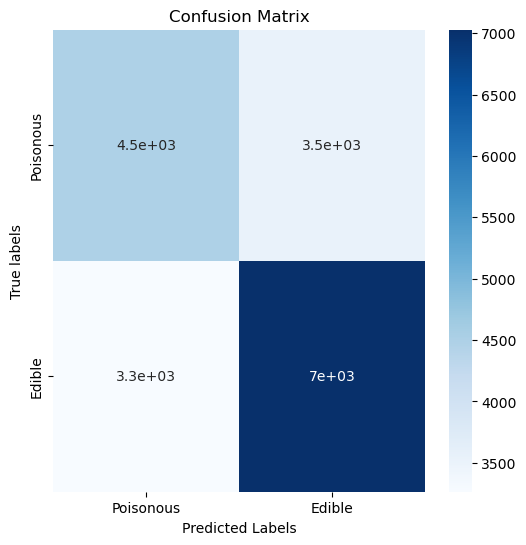

In [32]:
cm = confusion_matrix(Y_test, Y_pred)
classes = ['Poisonous', 'Edible']
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')